<a href="https://colab.research.google.com/github/Alecia113/NLP-Ex/blob/main/Ex4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://blog.csdn.net/skywuuu/article/details/111880466?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161749993416780266223365%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=161749993416780266223365&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~baidu_landing_v2~default-4-111880466.first_rank_v2_pc_rank_v29&utm_term=vanilla+RNN
'''
估计是原理还没弄懂
'''

In [11]:
'''
1.描述Bi-RNN优于vanilla（香草）RNN
'''

'''
双向RNN实际上仅仅是两个独立的RNN放在一起,
因此我们引入今天所讲的循环神经网络(recurrent neural network)，其主要的用处就是处理和预测序列数据。

在RNN中只考虑了预测词前面的词，即只考虑了上下文中“上文”，并没有考虑该词后面的内容。
这可能会错过了一些重要的信息，使得预测的内容不够准确。

双向RNN也是基于这种思想，不仅从前往后(如下图黄色实箭头)保留该词前面的词的重要信息，
而且从后往前(如下图黄色虚箭头)去保留该词后面的词的重要信息，然后基于这些重要信息进行预测该词。
把词拼接起来就是原本两个一维，就会变成二维
另外，双向RNN需要保存两个方向的权重矩阵，所以需要的内存约为RNN的两倍。

双向RNN使用的场景：有些情况下，当前的输出不只依赖于之前的序列元素，还可能依赖之后的序列元素； 
比如做完形填空，机器翻译等应用

Tensorflow 中实现双向RNN 的API是：bidirectional_dynamic_rnn； 其本质主要是做了两次reverse：
第一次reverse:将输入序列进行reverse,然后送入dynamic_rnn做一次运算.
第二次reverse:将上面dynamic_rnn返回的outputs进行reverse,保证正向和反向输出的time是对上的.

'''
'''
htz = f(WzXt + VzHt-1z +Bz)
htb = f(WbXt + VbHt+1b +Bb)
yt = g(U[htz;htb] + c)

'''

'''

vanilla 香草也有普通的
如果要识别视频中狗的动作，那么就需要一个新的网络（当然这里就是RNN啦）来分析这种序列数据。
只要有序列数据，我们就可以用RNN来进行分析。
优点

无论序列长度如何，模型都月相同的输入大小 (same input size)
在每一步中都有可能使用相同的转换函数 f f f和相同的参数

'''


'\n\nvanilla 香草也有普通的\n如果要识别视频中狗的动作，那么就需要一个新的网络（当然这里就是RNN啦）来分析这种序列数据。\n只要有序列数据，我们就可以用RNN来进行分析。\n优点\n\n无论序列长度如何，模型都月相同的输入大小 (same input size)\n在每一步中都有可能使用相同的转换函数 f f f和相同的参数\n\n'

##E1. Briefly describe the advantage of Bi-RNN over vanilla RNN.
Please write down your answer below in your own words. 

Your answer:The advantage of Bi-RNN is more accuracy. Because Bi-RNN not only use the forward information but use the backward information to help itself improve prediction.

In [12]:
'''
使用Bi-RNN进行文本分类
做完了数据集的预处理（扩展部分中）+ 嵌入；
要做的是模型
【要求】 用：torch.nn.RNN 将'bidirectional' 参数设置为True 来实现Bi-RNN

【指导】使用Bi-RNN， 将连接前向和后向隐藏状态进行最终预测。
可以从torch.nn.RNN 的第二个返回值中的h_n中提取向前和向后的最后一个隐藏状态。
 可以通过串联向前和向后RNN层中的最后一个隐藏状态来实现它（torch.cat)
'''

'''
下载数据集
分割数据集
模型（要做的）

【要求】 通过更新超参数，测试集'加权平均'f1 应该至少达到0.4； （至少应该有一个输出达到0.4）

torch.cat

torch.cat(inputs, dimension=0) → Tensor

在给定维度上对输入的张量序列seq 进行连接操作。

torch.cat()可以看做 torch.split() 和 torch.chunk()的反操作。 cat() 函数可以通过下面例子更好的理解。
 C=torch.cat((A,B),0)#按维数0（行）拼接
  C=torch.cat((A,D),1)#按维数1（列）拼接

'''

"\n下载数据集\n分割数据集\n模型（要做的）\n\n【要求】 通过更新超参数，测试集'加权平均'f1 应该至少达到0.4； （至少应该有一个输出达到0.4）\n\n\n"

## E2. (Text classification using Bi-RNN)

In this exercise, you are going to implement a **Bi-RNN model** to perform a text classification task. Please notice that we have already done the preprocessing and embedding part of the dataset (The preprocessing is provided in the [Extension section](#scrollTo=3OSJFmG1C6HW)). You only need to focus on the Model part.

Tips: [torch.nn.RNN](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html#torch.nn.RNN) that we used in the sections above can implement Bi-RNN by simpling setting the 'bidirectional' parameter to True. 




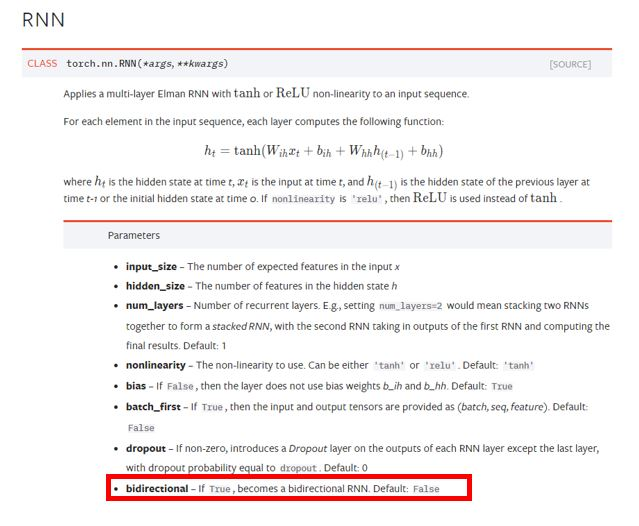

Using Bi-RNN, we will concatenate the forward and backward last hidden state for final prediction. The forward and backward last hidden state can be extracted from the *h_n* in the second returned value of torch.nn.RNN. You can implement it by concatenating last hidden states from both forward and backward RNN layer (using [torch.cat](https://pytorch.org/docs/stable/generated/torch.cat.html)).

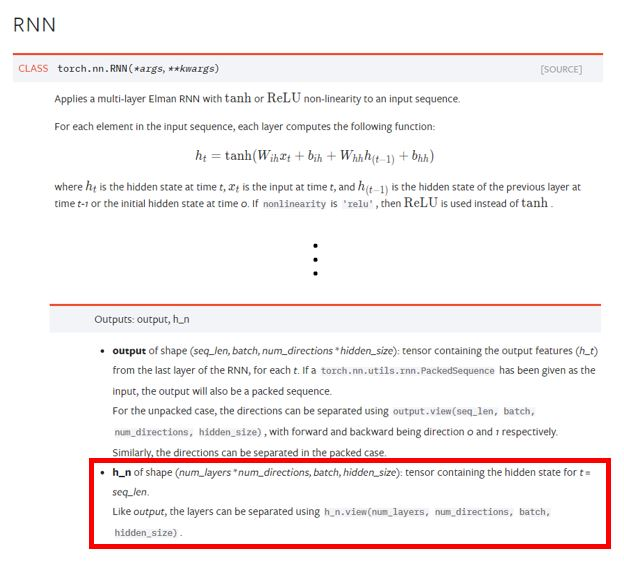

### Downloading dataset

In [13]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '16bT0gkTI3EEemyi-6rMaZ-bJHfsCbFGU'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('embedded_docs.pkl')  

id = '1xjgvacGXn5hSWERBw5zTAFtHessESCb-'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('labels.pkl')  

import pickle
input_embeddings = pickle.load(open("embedded_docs.pkl","rb"))
label = pickle.load(open("labels.pkl","rb"))

### Split the dataset

In [14]:
'''
训练潜入；测试嵌入； 训练标签；测试标签 = 训练测试分开（输入嵌入，标签， 测试集大小。
random_state : 在拆分之前，控制应用于数据的改组。

数据大小； 序列长度； 嵌入维度

训练嵌入形状：  数据1805， 长度512； 维度25
训练标签形状： 1805
'''

'\n训练潜入；测试嵌入； 训练标签；测试标签 = 训练测试分开（输入嵌入，标签， 测试集大小。\nrandom_state : 在拆分之前，控制应用于数据的改组。\n\n数据大小； 序列长度； 嵌入维度\n\n训练嵌入形状：  数据1805， 长度512； 维度25\n训练标签形状： 1805\n'

In [15]:
# Split into training and testing dataset using scikit-learn 
# For more details, you can refer to: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
import pprint
from sklearn.model_selection import train_test_split
train_embeddings, test_embeddings, train_label, test_label = train_test_split(input_embeddings,label,test_size = 0.2, random_state=0)

# The processed data has the shape of (data_size, sequence_length, embedding_dimension)
print(train_embeddings.shape)
print(train_label.shape)

(1805, 512, 25)
(1805,)


### Model (please complete the following sections)

**NOTE**: By updating hyperparameters, you should achieve **at least 0.4** for testset "weighted avg" f1. (There will be randomness in the training process, so tutors would run your code several times and there should be at least one of the output reaching 0.4)

***What is F1?***


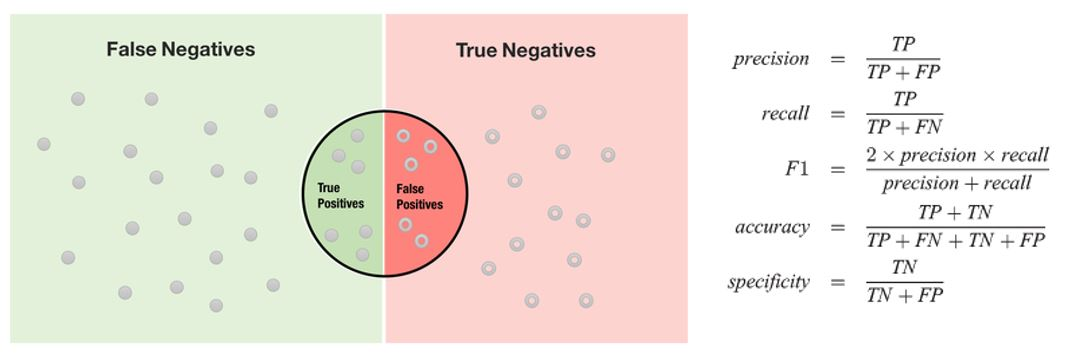

import torch
# You can enable GPU here (cuda); or just CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [16]:
import torch
# You can enable GPU here (cuda); or just CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:
import re
import gensim.downloader as api
import numpy as np


In [18]:
model = api.load("glove-twitter-25")  # download the model and return as object ready for use

In [19]:
from sklearn.datasets import fetch_20newsgroups # collect 4 types of news data
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']# 语料库
twenty_train = fetch_20newsgroups(subset='train',categories=categories, shuffle=True, random_state=42)
#训练集

In [20]:
def clean_str(string):    #正则法则删干净
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

In [21]:
doc_length_list = []
for doc in twenty_train.data:
    doc_length_list.append(len(clean_str(doc).split()))

In [22]:
#len(doc_length_list) 2257

In [23]:
maxlength = 512

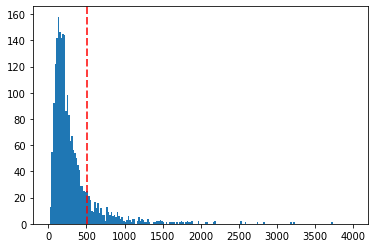

In [24]:
import matplotlib.pyplot as plt

plt.hist(doc_length_list, 200, range=(0,4000))
plt.axvline(x=maxlength,color="red",dashes=[5,2]) #dashes 破折号
plt.show()

In [25]:
embedded_docs = []
for doc in twenty_train.data:
    embedded_doc = []
    tokenized_doc = clean_str(doc).split()
    for i in range(maxlength):
        if i == len(tokenized_doc):
            for j in range(maxlength-i):
                embedded_doc.append([0]*25)
            break
        else:
            try:
                embedded_doc.append(model.wv[tokenized_doc[i]])
            except:
                embedded_doc.append([0]*25)
    
    embedded_docs.append(embedded_doc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if sys.path[0] == '':


In [26]:
#len(twenty_train)  5
#len(twenty_train.data) 2257 list
#len(tokenized_doc) #单独单词 117 list
#len(embedded_doc)  512 list
#embedded_doc[0]     25
'''
array([-0.61824 , -0.073506,  0.33202 ,  0.23654 , -0.49987 , -0.5676  ,
        1.1735  , -0.28648 , -0.012922,  0.038743,  0.37337 ,  0.51073 ,
       -5.3707  ,  0.23453 ,  0.15534 , -0.63122 ,  0.15094 , -0.20116 ,
       -0.29369 , -0.21334 , -0.71956 , -0.74923 ,  0.033165, -0.74508 ,
       -0.20883 ], dtype=float32)

       '''
#embedded_docs       #3维张量，感觉像是张量 

'\narray([-0.61824 , -0.073506,  0.33202 ,  0.23654 , -0.49987 , -0.5676  ,\n        1.1735  , -0.28648 , -0.012922,  0.038743,  0.37337 ,  0.51073 ,\n       -5.3707  ,  0.23453 ,  0.15534 , -0.63122 ,  0.15094 , -0.20116 ,\n       -0.29369 , -0.21334 , -0.71956 , -0.74923 ,  0.033165, -0.74508 ,\n       -0.20883 ], dtype=float32)\n\n       '

In [27]:
embedded_docs = np.array(embedded_docs)
print(embedded_docs.shape)
labels = np.asarray(twenty_train.target)
print(labels.shape)

(2257, 512, 25)
(2257,)


In [28]:
import pickle
# write to cPickle
pickle.dump(embedded_docs, open( "embedded_docs.pkl", "wb" ) )
pickle.dump(labels, open( "labels.pkl", "wb" ) )

预处理

In [29]:
'''
data_size, sequence_length, embedding_dimension)
(1805, 512, 25)
'''

'\ndata_size, sequence_length, embedding_dimension)\n(1805, 512, 25)\n'

In [47]:
import torch.nn as nn
import torch.nn.functional as F

from torch.autograd import Variable

#RuntimeError: mat1 and mat2 shapes cannot be multiplied (25x512 and 256x25)
class Bi_RNN_Model(nn.Module):
    def __init__(self):
        super(Bi_RNN_Model, self).__init__()
        # Please complete the code for the modeling part #模型
        self.n_hidden = n_hidden
        
        self.rnn = nn.RNN(n_input, n_hidden, num_layers = 2, batch_first= True, dropout = 0.2, bidirectional = True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):        
        # Please complete the code for forward propagation·#正向传播
        #模型没写h0，c0
       # h0 = Variable(torch.zeros(2*2,x.size(0),self.n_hidden))
       # c0 = Variable(torch.zeros(2*2,x.size(0),self.n_hidden))
      #  rnn_output, h_n = self.rnn(x,(h0,c0))
        rnn_output, h_n = self.rnn(x)
        x_last = rnn_output[:,-1,:]
        output = self.linear(x_last)    #x

        return output #x


In [51]:
import numpy as np
import torch.optim as optim
#使用 其他变量（而不是硬代码） 为这些变量分配值
# Please assign values to these variables by using other variables (instead of hard code)
# This should be the length of each sequence
seq_length = 512
# This should be the input feature dimension
n_input = 25
# This should be the number of class
n_class = 25

#Please decide the hyperparameters here by yourself
n_hidden = 64    #64；256
batch_size = 25    #25
total_epoch = 20
learning_rate = 0.01

In [32]:
'''
【要求】 用：torch.nn.RNN 将'bidirectional' 参数设置为True 来实现Bi-RNN

【指导】使用Bi-RNN， 将连接前向和后向隐藏状态进行最终预测。
可以从torch.nn.RNN 的第二个返回值中的h_n中提取向前和向后的最后一个隐藏状态。
 可以通过串联向前和向后RNN层中的最后一个隐藏状态来实现它（torch.cat)


【要求】 通过更新超参数，测试集'加权平均'f1 应该至少达到0.4； （至少应该有一个输出达到0.4）

RuntimeError: mat1 and mat2 shapes cannot be multiplied (512x256 and 128x4)

RuntimeError: mat1和 mat2形状不能相乘(25x512和256x25)
RuntimeError: mat1 and mat2 shapes cannot be multiplied (512x512 and 256x4)
RuntimeError: mat1 and mat2 shapes cannot be multiplied (512x512 and 256x25)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (25x512 and 256x25)
RuntimeError: mat1 and mat2 shapes cannot be multiplied (256x512 and 256x25)
RuntimeError: mat1 and mat2 shapes cannot be multiplied (256x1024 and 512x25)
RuntimeError: mat1 and mat2 shapes cannot be multiplied (256x128 and 64x25)
RuntimeError: mat1 and mat2 shapes cannot be multiplied (25x128 and 64x25)


'''

"\n【要求】 用：torch.nn.RNN 将'bidirectional' 参数设置为True 来实现Bi-RNN\n\n【指导】使用Bi-RNN， 将连接前向和后向隐藏状态进行最终预测。\n可以从torch.nn.RNN 的第二个返回值中的h_n中提取向前和向后的最后一个隐藏状态。\n 可以通过串联向前和向后RNN层中的最后一个隐藏状态来实现它（torch.cat)\n\n\n【要求】 通过更新超参数，测试集'加权平均'f1 应该至少达到0.4； （至少应该有一个输出达到0.4）\n\nRuntimeError: mat1 and mat2 shapes cannot be multiplied (512x256 and 128x4)\n\nRuntimeError: mat1和 mat2形状不能相乘(25x512和256x25)\nRuntimeError: mat1 and mat2 shapes cannot be multiplied (512x512 and 256x4)\nRuntimeError: mat1 and mat2 shapes cannot be multiplied (512x512 and 256x25)\n\nRuntimeError: mat1 and mat2 shapes cannot be multiplied (25x512 and 256x25)\nRuntimeError: mat1 and mat2 shapes cannot be multiplied (256x512 and 256x25)\n"

In [ ]:
from sklearn.metrics import accuracy_score

model = Bi_RNN_Model().to(device)       # 原： RNN_Model 现： Bi_RNN_Model
criterion = nn.CrossEntropyLoss()

# Please find which optimizer provides a higher f1  请找出哪个优化程序可以提供更高的F1
optimizer = optim.Adam(model.parameters(), lr = learning_rate) #optimizer = optim.Adam(model.parameters(), lr = learning_rate)
#optimizer = torch.optim.Adam(rnn.parameters(),lr=learning_rate)
for epoch in range(total_epoch):
    train_loss = 0        #准备了一波input
    for ind in range(0,train_embeddings.shape[0],batch_size):
        input_batch = train_embeddings[ind:min(ind+batch_size, train_embeddings.shape[0])]
        target_batch = train_label[ind:min(ind+batch_size, train_embeddings.shape[0])]
        input_batch_torch = torch.from_numpy(input_batch).float().to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)

        model.train()
        optimizer.zero_grad()
        outputs = model(input_batch_torch) 
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer.step()
                  #老几步，少了个 _, predicted = torch.max(outputs, 1)
        train_loss += loss.item()

    print('Epoch: %d, train loss: %.5f'%(epoch + 1, train_loss))

print('Finished Training')

## Prediction 预测
model.eval()
outputs = model(torch.from_numpy(test_embeddings).float().to(device)) 
predicted = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
# The returned report includes the 'weighted avg f1' we want (refer to the sample output)
# More details can be found from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report
print(classification_report(test_label, predicted.cpu().numpy(),digits=4))

Epoch: 1, train loss: 110.53137
Epoch: 2, train loss: 107.18378
Epoch: 3, train loss: 106.13152
Epoch: 4, train loss: 105.76112
Epoch: 5, train loss: 105.50834
Epoch: 6, train loss: 105.18468
Epoch: 7, train loss: 105.31267
Epoch: 8, train loss: 105.32798
Epoch: 9, train loss: 105.53584
Epoch: 10, train loss: 105.40647
Epoch: 11, train loss: 105.45522
Epoch: 12, train loss: 105.24173


In [ ]:
# The following is the sample output, including the training log and the classification report returned by classification_report
# This is only for output format reference, it is impossible to get the same result (randomness in the training process etc.).

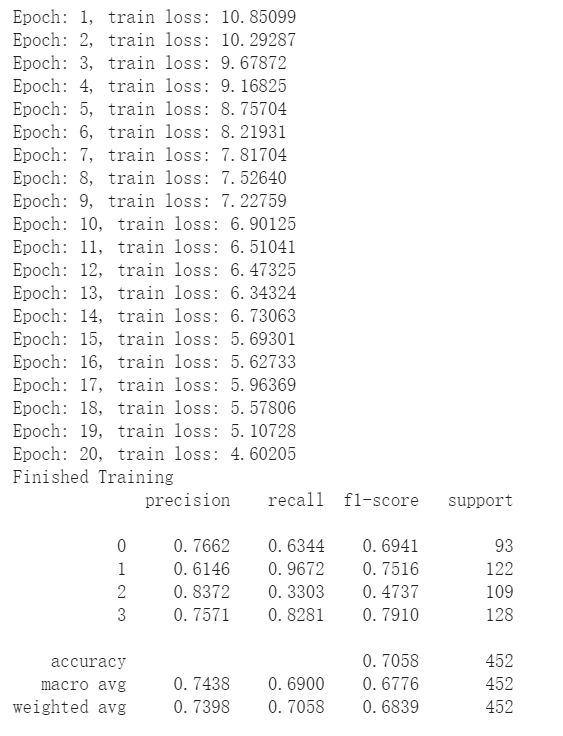